Tasks
- First, explore fitting this data with the tecniques we have seen.
- Start from linear regression and polynomial regression
- For the case of polynomial regression, just fit many of them for now.
- Let's bet based on intuition! Which fit is the best?
- In what cases are you underfitting the data?
- In what cases are you overfitting the data?
- Now split the data into training and validation sets
- Implement a cross-validation procedure
- Pick the best!
- Does it agree with our bets?
- Repeat with Basis Function Regression and Kernel Regression
- Explore what happens when you change the number of datapoints and plot the resulting learning curves.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
path = r"C:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Utilities"
sys.path.append(path)
import plot_settings

In [3]:
data = np.genfromtxt(r'C:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Arguments\ML\SN_v0\mu_z.txt', delimiter=' ')

In [4]:
z_sample  = data[:, 0]
mu_sample = data[:, 1]
dmu       = data[:, 2]

<>:3: SyntaxWarning: invalid escape sequence '\m'
<>:3: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ricca\AppData\Local\Temp\ipykernel_19016\2962798895.py:3: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


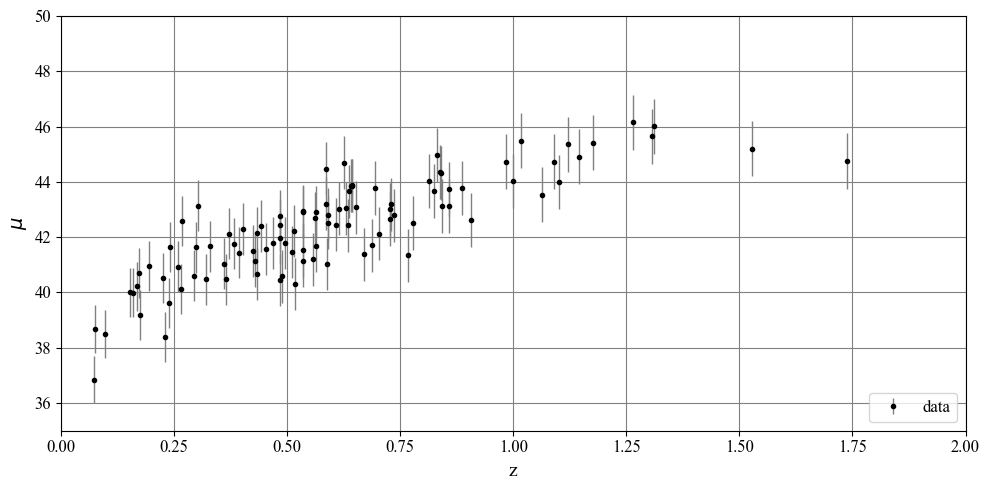

In [5]:
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50);

## Linear Regression

In [6]:
from astroML.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


In [7]:
LR = LinearRegression()

In [69]:
z_train, z_test, mu_train, mu_test, mu_err_train, mu_err_test = train_test_split(z_sample, mu_sample, dmu, test_size=0.1, random_state=42)

In [9]:
LR.fit(z_train.reshape((-1,1)), mu_train, mu_err_train)

LinearRegression()

In [10]:
vals = LR.predict(z_test.reshape((-1,1)))

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
Train_RMS = mean_squared_error(mu_train, LR.predict(z_train.reshape((-1,1))))
Test_RMS = mean_squared_error(mu_test, vals)

In [13]:
print("Train RMS: ", Train_RMS)
print("Test RMS: ", Test_RMS)

Train RMS:  0.9843012422272611
Test RMS:  0.8866863424036687


<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ricca\AppData\Local\Temp\ipykernel_19016\2616558149.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


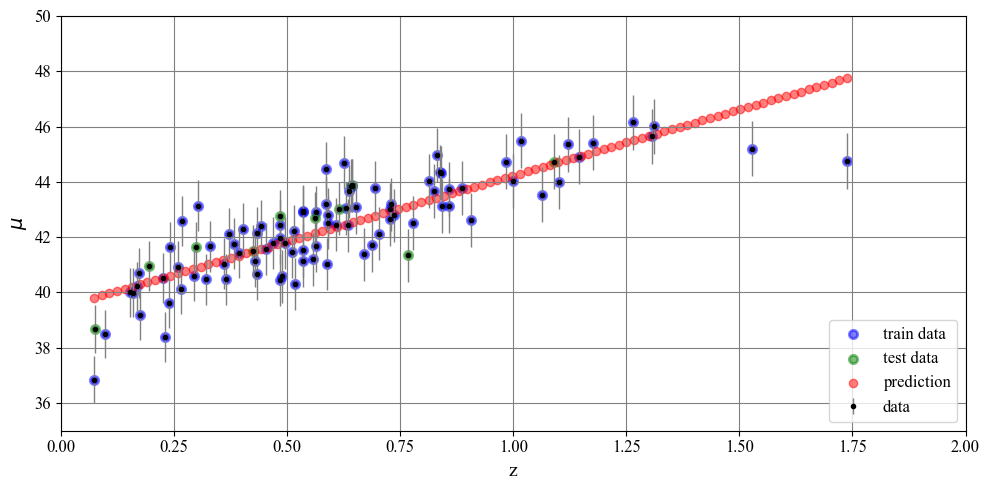

In [14]:
x_fit = np.linspace(min(z_sample), max(z_sample), 100)
y_fit = LR.predict(x_fit.reshape((-1,1)))

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.scatter(z_train, mu_train, color='blue', alpha=0.5, lw=2, label='train data')
plt.scatter(z_test, mu_test, color='green', alpha=0.5, lw=2, label='test data')
plt.scatter(x_fit, y_fit, color='red', alpha = 0.5, label='prediction')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50);

## Polynomial Regression

In [51]:
from astroML.linear_model import PolynomialRegression as astroPR

In [52]:
PR = astroPR(degree=1)

In [17]:
PR.fit(z_train.reshape((-1,1)), mu_train, mu_err_train)

PolynomialRegression()

In [18]:
vals = PR.predict(z_test.reshape((-1,1)))

In [19]:
Test_RMS = mean_squared_error(mu_test, vals)
Train_RMS= mean_squared_error(mu_train, PR.predict(z_train.reshape((-1,1))))

In [20]:
print("Train RMS: ", Train_RMS)
print("Test RMS: ", Test_RMS)

Train RMS:  0.9843012422272611
Test RMS:  0.8866863424036687


<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ricca\AppData\Local\Temp\ipykernel_19016\1702322470.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


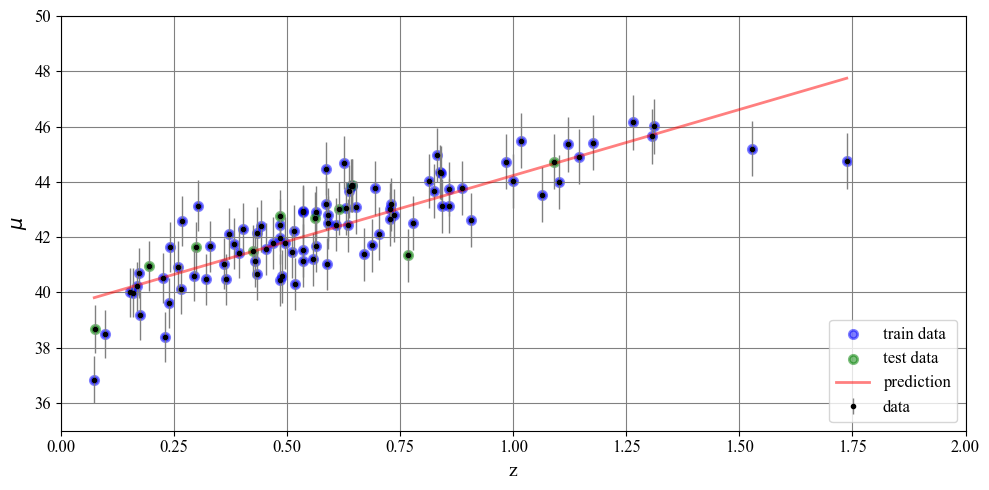

In [21]:
x_fit = np.linspace(min(z_sample), max(z_sample), 100)
y_fit = LR.predict(x_fit.reshape((-1,1)))

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.scatter(z_train, mu_train, color='blue', alpha=0.5, lw=2, label='train data')
plt.scatter(z_test, mu_test, color='green', alpha=0.5, lw=2, label='test data')
plt.plot(x_fit, y_fit, color='red', alpha = 0.5, label='prediction')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50);

Let's change the polinomial degree

In [22]:
degrees = np.arange(1, 15)

<>:5: SyntaxWarning: invalid escape sequence '\m'
<>:5: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ricca\AppData\Local\Temp\ipykernel_19016\816763847.py:5: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


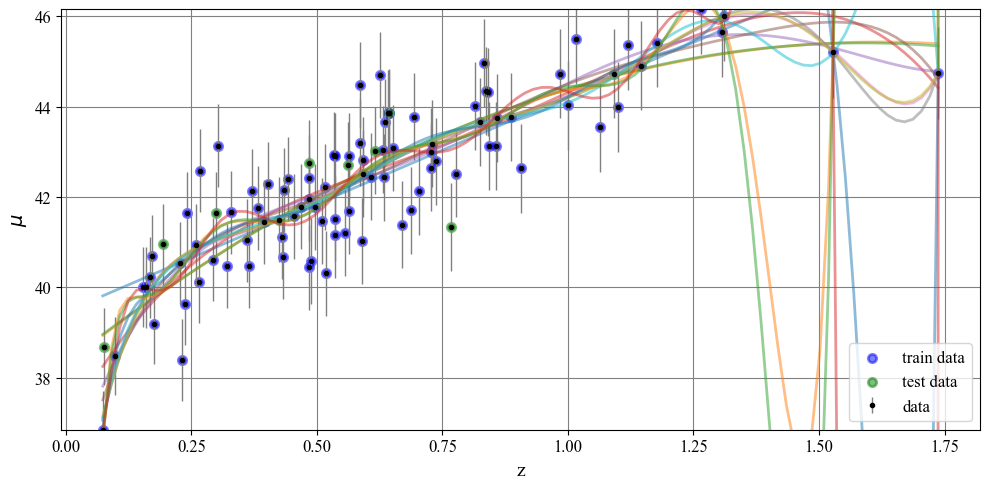

In [23]:
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.scatter(z_train, mu_train, color='blue', alpha=0.5, lw=2, label='train data')
plt.scatter(z_test, mu_test, color='green', alpha=0.5, lw=2, label='test data')
plt.xlabel("z")
plt.ylabel("$\mu$")

testrms, trainrms = [], []
for deg in degrees:
    PR = PolynomialRegression(degree=deg)
    PR.fit(z_train.reshape((-1,1)), mu_train, mu_err_train)
    vals = PR.predict(z_test.reshape((-1,1)))
    testrms.append(mean_squared_error(mu_test, vals))
    trainrms.append(mean_squared_error(mu_train, PR.predict(z_train.reshape((-1,1)))))
    y_fit = PR.predict(x_fit.reshape((-1,1)))
    plt.plot(x_fit, y_fit,alpha = 0.5)#, label=f'degree {deg}')
plt.legend(loc='lower right')   
plt.ylim(min(mu_sample),max(mu_sample)); 

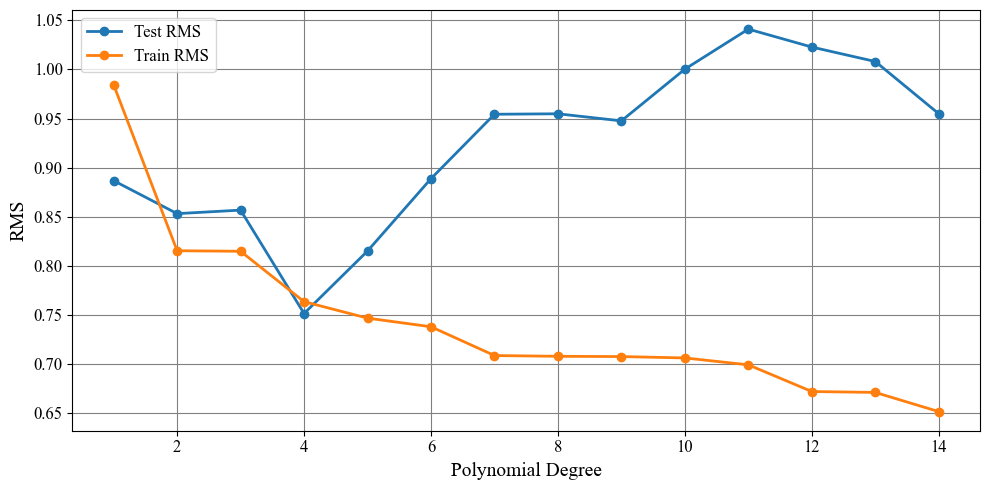

In [24]:
plt.plot(degrees, testrms, label='Test RMS', marker='o')
plt.plot(degrees, trainrms, label='Train RMS', marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMS')
plt.legend()

Seems to me that the test RMS error is minimized by a degree equal to four.\
It's strange that the training keeps going down...\
Also as the degree goes up, the model predictions tend to be more and more dependent on the last points ending up in the test set. We should cross validate.

## Cross validation

In [31]:
degrees = np.linspace(1, 15, 10, dtype=int)

In [34]:
'''
scaler = StandardScaler()
z_train_scaled = scaler.fit_transform(z_train.reshape(-1, 1))
z_test_scaled = scaler.transform(z_test.reshape(-1, 1))
'''

'\nscaler = StandardScaler()\nz_train_scaled = scaler.fit_transform(z_train.reshape(-1, 1))\nz_test_scaled = scaler.transform(z_test.reshape(-1, 1))\n'

In [47]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [92]:
scaler = StandardScaler()
z_scaled = scaler.fit_transform(z_sample.reshape(-1, 1))

In [95]:
k=10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

best_score = np.inf
best_degree = 0

test_scores = []

for degree in range(1, 8):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    scores = cross_val_score(model, z_scaled.reshape(-1, 1), mu_sample, cv=kf, scoring='neg_mean_squared_error')
    scores = -scores  # Negate the scores to get positive MSE
    mean_score = np.mean(scores)
    print(f"Degree: {degree}, Mean MSE: {mean_score:.4f}")
    test_scores.append(mean_score)
    

Degree: 1, Mean MSE: 1.0627
Degree: 2, Mean MSE: 0.8777
Degree: 3, Mean MSE: 0.9260
Degree: 4, Mean MSE: 0.9335
Degree: 5, Mean MSE: 0.8258
Degree: 6, Mean MSE: 3.2662
Degree: 7, Mean MSE: 1.0413


Text(0.5, 1.0, 'Cross-Validation Mean MSE vs Polynomial Degree')

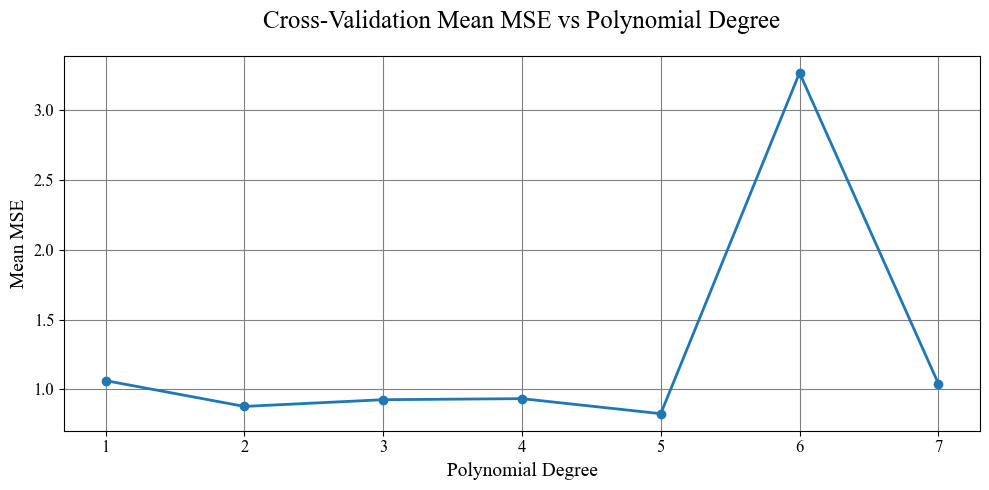

In [97]:
plt.plot(range(1, 8), test_scores, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean MSE')
plt.title('Cross-Validation Mean MSE vs Polynomial Degree')

## Basis Function Regression

In [98]:
from sklearn.preprocessing import FunctionTransformer

In [99]:
centers = np.linspace(min(z_sample), max(z_sample), 10)
sigma = 0.1
def gaussian_basis(X):
    # X is expected to be 2D (n_samples, 1)
    return np.exp(-0.5 * ((X - centers) / sigma) ** 2)

Cross Validation on number of gaussians

In [101]:
for N in range(1, 15):
    centers = np.linspace(min(z_sample), max(z_sample), N)
    sigma = 1/N
    def gaussian_basis(X):
        # X is expected to be 2D (n_samples, 1)
        return np.exp(-0.5 * ((X - centers) / sigma) ** 2)
    model = make_pipeline(FunctionTransformer(gaussian_basis), LinearRegression())
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    model = make_pipeline(FunctionTransformer(gaussian_basis), LinearRegression())
    scores = cross_val_score(model, z_sample.reshape(-1, 1), mu_sample, cv=kf, scoring='neg_mean_squared_error')
    scores = -scores  # Negate the scores to get positive MSE
    mean_score = np.mean(scores)
    print(f"N = {N}, Mean MSE: {mean_score:.4f}")

N = 1, Mean MSE: 1.3527
N = 2, Mean MSE: 1.0057
N = 3, Mean MSE: 1.0473
N = 4, Mean MSE: 0.9472
N = 5, Mean MSE: 0.9245
N = 6, Mean MSE: 0.9721
N = 7, Mean MSE: 1.3750
N = 8, Mean MSE: 0.8835
N = 9, Mean MSE: 9.3562
N = 10, Mean MSE: 1767.5397
N = 11, Mean MSE: 43441.2386
N = 12, Mean MSE: 92004.9421
N = 13, Mean MSE: 118614785.5641
N = 14, Mean MSE: 4724095201311.4219


Ok but this doesn't say much at all. We now know that the number of gaussians to use should be 6, with a sigma of 1/6...But the choice of sigma scaling law was completely random...how to overcome this problem?

## Kernel Regression

In [102]:
from sklearn.metrics import pairwise
from sklearn.kernel_ridge import KernelRidge

Linear Kernel

In [147]:
model = KernelRidge(kernel='linear', alpha=1e-5)  # RBF = Gaussian kernel
model.fit(z_train.reshape((-1,1)), mu_train)
y_pred = model.predict(z_test.reshape((-1,1)))

<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ricca\AppData\Local\Temp\ipykernel_19016\1013741258.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


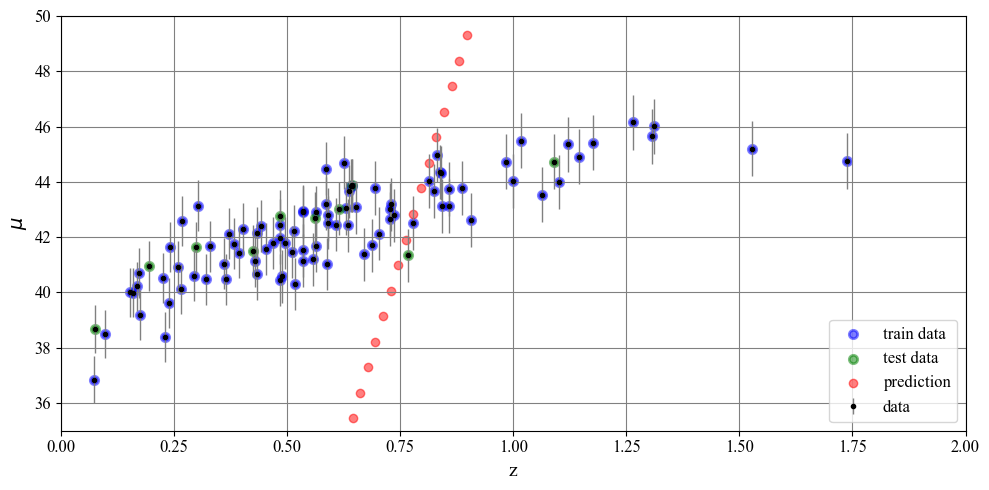

In [148]:
x_fit = np.linspace(min(z_sample), max(z_sample), 100)
y_fit = model.predict(x_fit.reshape((-1,1)))

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.scatter(z_train, mu_train, color='blue', alpha=0.5, lw=2, label='train data')
plt.scatter(z_test, mu_test, color='green', alpha=0.5, lw=2, label='test data')
plt.scatter(x_fit, y_fit, color='red', alpha = 0.5, label='prediction')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50);

Does not work.

Gaussian Kernel

In [149]:
model = KernelRidge(kernel='rbf', gamma=1.0, alpha=0)  # RBF = Gaussian kernel
model.fit(z_train.reshape((-1,1)), mu_train)
y_pred = model.predict(z_test.reshape((-1,1)))

c:\Users\ricca\Documents\Unimib-Code\Astrostatistics\Notebooks\venv\Lib\site-packages\sklearn\linear_model\_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ricca\AppData\Local\Temp\ipykernel_19016\1646766472.py:9: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


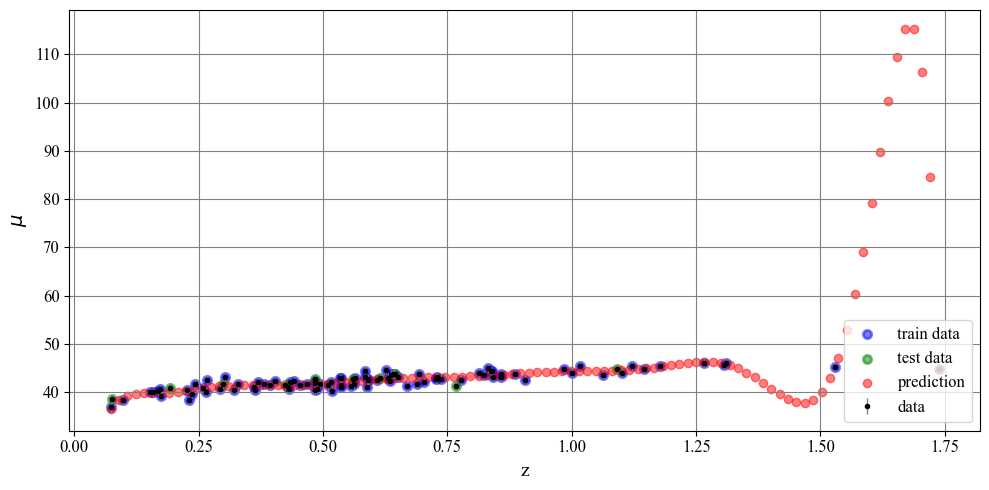

In [150]:
x_fit = np.linspace(min(z_sample), max(z_sample), 100)
y_fit = model.predict(x_fit.reshape((-1,1)))

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.scatter(z_train, mu_train, color='blue', alpha=0.5, lw=2, label='train data')
plt.scatter(z_test, mu_test, color='green', alpha=0.5, lw=2, label='test data')
plt.scatter(x_fit, y_fit, color='red', alpha = 0.5, label='prediction')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='lower right')

Let's do cross validation cicling on the bandwidth of the Kernels

In [151]:
k=10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

best_score = np.inf
best_degree = 0

test_scores = []

for g in np.linspace(0.01,1, 10):
    model = KernelRidge(alpha=1e-2, kernel='rbf', gamma=g)
    scores = cross_val_score(model, z_sample.reshape(-1, 1), mu_sample, cv=kf, scoring='neg_mean_squared_error')
    scores = -scores  # Negate the scores to get positive MSE
    mean_score = np.mean(scores)
    test_scores.append(mean_score)
    

Text(0.5, 1.0, 'Cross-Validation Mean MSE vs Gamma')

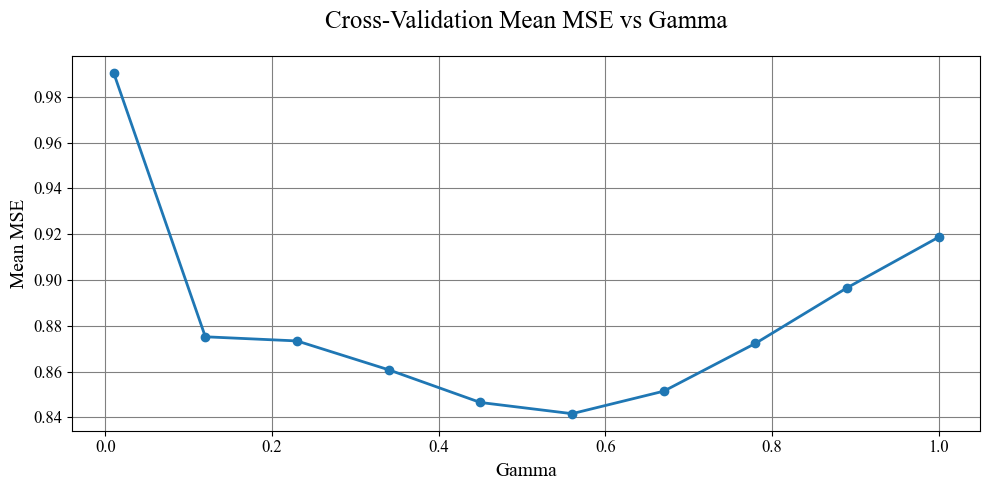

In [152]:
plt.plot(np.linspace(0.01, 1, 10), test_scores, marker='o')
plt.xlabel('Gamma')
plt.ylabel('Mean MSE')
plt.title('Cross-Validation Mean MSE vs Gamma')

In [153]:
model = KernelRidge(kernel='rbf', gamma=0.55, alpha=1e-2)  # RBF = Gaussian kernel
model.fit(z_train.reshape((-1,1)), mu_train)
y_pred = model.predict(z_test.reshape((-1,1)))

<>:13: SyntaxWarning: invalid escape sequence '\m'
<>:13: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ricca\AppData\Local\Temp\ipykernel_19016\510341536.py:13: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mu$")


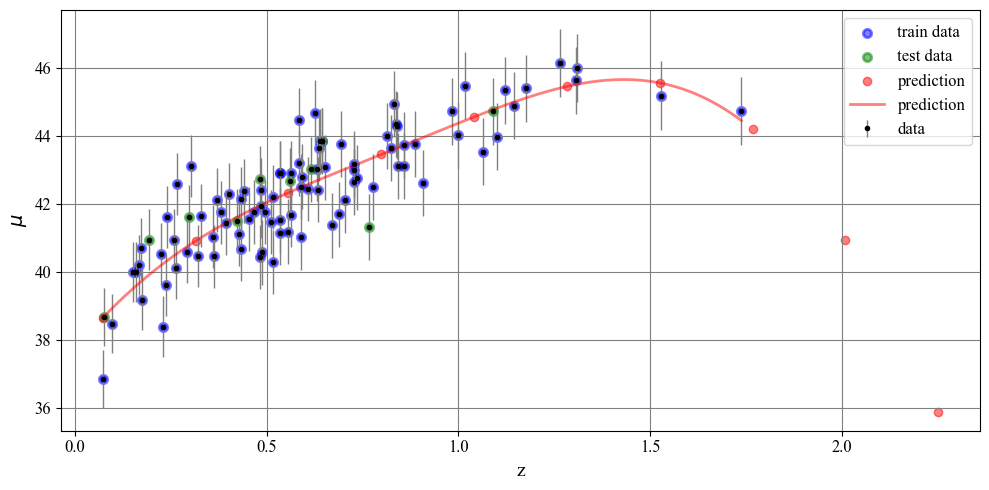

In [160]:
x_fit = np.linspace(min(z_sample),max(z_sample), 100)
y_fit = model.predict(x_fit.reshape((-1,1)))

x_fit_scatter = np.linspace(min(z_sample),2.25, 10)
y_fit_scatter = model.predict(x_fit_scatter.reshape((-1,1)))

plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.scatter(z_train, mu_train, color='blue', alpha=0.5, lw=2, label='train data')
plt.scatter(z_test, mu_test, color='green', alpha=0.5, lw=2, label='test data')
plt.scatter(x_fit_scatter, y_fit_scatter, color='red', alpha = 0.5, label='prediction')
plt.plot(x_fit, y_fit, color='red', alpha = 0.5, label='prediction')
plt.xlabel("z")
plt.ylabel("$\mu$")
plt.legend(loc='upper right')